In [6]:
import pandas as pd
import folium
import numpy as np

In [7]:
summer_olympics_hosts = {
    1924: "FRA",  # France
    1928: "NED",  # Netherlands
    1932: "USA",  # United States
    1936: "GER",  # Germany
    1948: "GBR",  # United Kingdom
    1952: "FIN",  # Finland
    1956: "AUS",  # Australia
    1960: "ITA",  # Italy
    1964: "JPN",  # Japan
    1968: "MEX",  # Mexico
    1972: "FRG",  # West Germany (FRG = Federal Republic of Germany)
    1976: "CAN",  # Canada
    1980: "URS",  # Soviet Union
    1984: "USA",  # United States
    1988: "KOR",  # South Korea
    1992: "ESP",  # Spain
    1996: "USA",  # United States
    2000: "AUS",  # Australia
    2004: "GRE",  # Greece
    2008: "CHN",  # China
    2012: "GBR",  # United Kingdom
    2016: "BRA",  # Brazil
    2020: "JPN",  # Japan
    2024: "FRA",  # France
}

In [8]:
df_full = pd.read_excel('Olympics_dataset_Final_product.xlsx')

In [9]:
df = df_full[df_full['season'].isin(['Summer Olympics', 'Winter Olympics'])]
df_swimming = df[df['sport'] == 'Swimming']
df_swimming

,unknown_id,id,used_name,full_name,gender,height_in_cm,weight_in_kg,birth_date,birth_date_Olympedia,age,...,Born,Died,NOC,Affiliations,Nick/petnames,Title(s),Other names,Nationality,Original name,Name order
24,540.0,183.0,D. Frangopoulos,D. Frangopoulos,Male,NaN,NaN,17 April 1878,NaN,18.0,...,NaN,NaN,Greece,Panakhaikos Syllogos Patron,NaN,NaN,NaN,NaN,Δ.•Φρανγόπουλοσ,NaN
25,541.0,183.0,D. Frangopoulos,D. Frangopoulos,Male,NaN,NaN,17 April 1878,NaN,18.0,...,NaN,NaN,Greece,Panakhaikos Syllogos Patron,NaN,NaN,NaN,NaN,Δ.•Φρανγόπουλοσ,NaN
26,542.0,183.0,D. Frangopoulos,D. Frangopoulos,Male,NaN,NaN,17 April 1878,NaN,18.0,...,NaN,NaN,Greece,Panakhaikos Syllogos Patron,NaN,NaN,NaN,NaN,Δ.•Φρανγόπουλοσ,NaN
93,37301.0,21169.0,Otto Herschmann,Otto Herschmann,Male,NaN,NaN,4 January 1877,4 January 1877,19.0,...,"4 January 1877 in Wien (Vienna), Wien (AUT)","17 June 1942 in Sobibór, Lubelskie (POL)",Austria,"1.W.A.S.C., Wien (AUT) / Wiener AC, Wien (AUT)",NaN,NaN,NaN,NaN,NaN,NaN
94,37303.0,21169.0,Otto Herschmann,Otto Herschmann,Male,NaN,NaN,4 January 1877,4 January 1877,19.0,...,"4 January 1877 in Wien (Vienna), Wien (AUT)","17 June 1942 in Sobibór, Lubelskie (POL)",Austria,"1.W.A.S.C., Wien (AUT) / Wiener AC, Wien (AUT)",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315647,295139.0,144950.0,Han Da-Gyeong,Han Da-Gyeong,Female,NaN,NaN,31 January 2000,31 January 2000,20.0,...,31 January 2000,NaN,Republic of Korea,NaN,NaN,NaN,NaN,NaN,NaN,Oriental
315648,295140.0,144950.0,Han Da-Gyeong,Han Da-Gyeong,Female,NaN,NaN,31 January 2000,31 January 2000,20.0,...,31 January 2000,NaN,Republic of Korea,NaN,NaN,NaN,NaN,NaN,NaN,Oriental
315653,295141.0,144950.0,Han Da-Gyeong,Han Da-Gyeong,Female,NaN,NaN,31 January 2000,31 January 2000,20.0,...,31 January 2000,NaN,Republic of Korea,NaN,NaN,NaN,NaN,NaN,NaN,Oriental
315674,NaN,1907187.0,Sven Schwarz,NaN,Male,NaN,NaN,31 January 2002,NaN,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
medal_to_points = {
    'Gold': 3,
    'Silver': 2,
    'Bronze': 1,    
    None: 0,
}

df_swimming['medal_points'] = df_swimming['medal'].apply(lambda x: medal_to_points.get(x, 0))

C:\Users\jakub\AppData\Local\Temp\ipykernel_34696\809174301.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swimming['medal_points'] = df_swimming['medal'].apply(lambda x: medal_to_points.get(x, 0))


In [11]:
def medalists_on_map(df, only_gold=False, name_map_suffix="map", after_year=None):
    if only_gold:
        df_medalists = df[df['medal'] == 'Gold']
    else:
        df_medalists = df_swimming[df_swimming['medal'].notna()]
    
    if after_year is not None:
        df_medalists = df_medalists[df_medalists['year'] > after_year]

    df_medalists = df_medalists.dropna(subset=['latitude', 'longitude'])
    m = folium.Map(location=[df_medalists['latitude'].mean(), df_medalists['longitude'].mean()], zoom_start=2)

    for _, row in df_medalists.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5,
            popup=f"{row['full_name']} - {row['medal']}",
            color='gold' if row['medal'] == 'Gold' else 'silver' if row['medal'] == 'Silver' else 'brown',
            fill=True,
            fill_opacity=0.7
        ).add_to(m)

    m.save(f'medalists_map_{name_map_suffix}.html')



medalists_on_map(df_swimming, only_gold=False, name_map_suffix="only_gold_swimmers", after_year=None)

In [12]:
cols = ['id', 'gender', 'age', 'birth_country_full', 'year', 'team', 'event', 'medal_points', 'place', 'Population', 'Gini', ]


gdp_cols = [col for col in df_swimming.columns if 'GDP' in col]
df_swimming_selected = df_swimming[cols + gdp_cols] 

In [13]:

from jakub_script import extract_all_features
event_column_name = 'event'

# Check if the column exists to prevent errors
if event_column_name not in df_swimming_selected.columns:
    print(f"Error: Column '{event_column_name}' not found in df_swimming.")
    print(f"Please check the column name. Available columns are: {df_swimming_selected.columns.tolist()}")
else:
    # Apply the feature extraction
    # It's good practice to work on a copy if you want to keep the original df_swimming unchanged
    df_swimming_with_features = extract_all_features(df_swimming_selected.copy(), event_column_name)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315761 entries, 0 to 315760
Data columns (total 48 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   unknown_id                                           300807 non-null  float64
 1   id                                                   315757 non-null  float64
 2   used_name                                            315761 non-null  object 
 3   full_name                                            300848 non-null  object 
 4   gender                                               315758 non-null  object 
 5   height_in_cm                                         235844 non-null  float64
 6   weight_in_kg                                         226131 non-null  float64
 7   birth_date                                           312861 non-null  object 
 8   birth_date_Olympedia                                 2

c:\Users\jakub\Desktop\turing_datathon\jakub_script.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swimming['medal_points'] = df_swimming['medal'].apply(lambda x: medal_to_points.get(x, 0))


DataFrame with new features (head):
      unknown_id       id            used_name  \
5955    108936.0  49775.0  Kazimierz Bocheński   
7120    103512.0  47918.0        Johann Schulz   
8492     99993.0  46584.0        Boris Roolaid   
8493     99994.0  46585.0         Egon Roolaid   
8499     99995.0  46585.0         Egon Roolaid   

                              full_name gender  height_in_cm  weight_in_kg  \
5955  Roman Kazimierz Wiesław Bocheński    Men           NaN           NaN   
7120                      Johann Schulz    Men           NaN           NaN   
8492         Boris Roolaid (Rosenberg-)    Men           NaN           NaN   
8493          Egon Roolaid (Rosenberg-)    Men         177.0          75.0   
8499          Egon Roolaid (Rosenberg-)    Men         177.0          75.0   

             birth_date birth_date_Olympedia   age  ...  medal_points  \
5955        12 May 1910          12 May 1910  26.0  ...             0   
7120                NaN                  NaN   N

In [14]:
df_swimming_with_features = df_swimming_with_features.drop(columns = ['total_distance_meters', 'relay_leg_distance_meters'])


In [15]:


df_analysis = df_swimming_with_features[df_swimming_with_features['year'] >= 1924]
df_analysis['event'] = df_analysis['event'].apply(lambda x: x.replace(', Women', "").replace(', Men', ""))
df_analysis['relay'] = df_analysis['event'].apply(lambda x: 1 if 'Relay' in x else 0)
df_analysis['Population'] = df_analysis['Population'].astype(float)

df_analysis['GDP per Capita'] = df_analysis['GDP per capita, PPP (constant 2021 international $)'].apply(lambda x: float(x) if x != 'no_data' else np.nan)

df_analysis['Gini'] = df_analysis['Gini'].apply(lambda x: float(x) if x != 'no_data' else np.nan)

df_analysis = pd.get_dummies(df_analysis, columns=['stroke'], drop_first=False)
df_analysis = df_analysis.drop(columns = ['stroke_Not Applicable'])

In [16]:
df_analysis

,unknown_id,id,used_name,full_name,gender,height_in_cm,weight_in_kg,birth_date,birth_date_Olympedia,age,...,unit,relay_legs,relay_leg_distance,relay,GDP per Capita,stroke_Backstroke,stroke_Breaststroke,stroke_Butterfly,stroke_Freestyle,stroke_Medley
5955,108936.0,49775.0,Kazimierz Bocheński,Roman Kazimierz Wiesław Bocheński,Men,NaN,NaN,12 May 1910,12 May 1910,26.0,...,metres,4.0,200.0,1,2964.654332,False,False,False,True,False
7120,103512.0,47918.0,Johann Schulz,Johann Schulz,Men,NaN,NaN,NaN,NaN,NaN,...,metres,1.0,100.0,0,7462.000614,True,False,False,False,False
8492,99993.0,46584.0,Boris Roolaid,Boris Roolaid (Rosenberg-),Men,NaN,NaN,3 February 1917,3 February 1917,19.0,...,metres,1.0,100.0,0,5560.968940,True,False,False,False,False
8493,99994.0,46585.0,Egon Roolaid,Egon Roolaid (Rosenberg-),Men,177.0,75.0,26 September 1918,26 September 1918,18.0,...,metres,1.0,100.0,0,5560.968940,False,False,False,True,False
8499,99995.0,46585.0,Egon Roolaid,Egon Roolaid (Rosenberg-),Men,177.0,75.0,26 September 1918,26 September 1918,18.0,...,metres,1.0,400.0,0,5560.968940,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315647,295139.0,144950.0,Han Da-Gyeong,Han Da-Gyeong,Women,NaN,NaN,31 January 2000,31 January 2000,20.0,...,metres,1.0,800.0,0,46506.933042,False,False,False,True,False
315648,295140.0,144950.0,Han Da-Gyeong,Han Da-Gyeong,Women,NaN,NaN,31 January 2000,31 January 2000,20.0,...,metres,1.0,1500.0,0,46506.933042,False,False,False,True,False
315653,295141.0,144950.0,Han Da-Gyeong,Han Da-Gyeong,Women,NaN,NaN,31 January 2000,31 January 2000,20.0,...,metres,4.0,200.0,1,46506.933042,False,False,False,True,False
315674,NaN,1907187.0,Sven Schwarz,NaN,Men,NaN,NaN,31 January 2002,NaN,22.0,...,metres,1.0,1500.0,0,61981.378942,False,False,False,True,False


In [19]:
aggregated_df = df_analysis.groupby(by=['team', 'year', 'gender', 'event_type']).agg(avg_age = ('age', 'mean'), 
                                                        gini = ('Gini', 'mean'),
                                                        events = ('event', 'count'),
                                                        points_sum = ('medal_points', 'sum'),
                                                        population = ('Population', 'mean'),
                                                        gdp_per_capita = ('GDP per Capita', 'mean'),
                                                        number_participants = ('id', 'nunique'),
                                                        relays = ('relay', 'sum'),
                                                        average_total_distance = ('total_distance', 'mean'),
                                                        total_butterfly = ('stroke_Butterfly', 'sum'),
                                                        total_freestyle = ('stroke_Freestyle', 'sum'),
                                                        total_medley = ('stroke_Medley', 'sum'),
                                                        total_breaststroke = ('stroke_Breaststroke', 'sum'),
                                                        total_backstroke = ('stroke_Backstroke', 'sum'),)


aggregated_df['host_indicator'] = [
    (country, year) in summer_olympics_hosts for country, year, gender, event_type  in aggregated_df.index
]

aggregated_df = aggregated_df.dropna()
aggregated_df['proportion_participants_to_population'] = aggregated_df['number_participants'] / aggregated_df['population']

#nomralize
aggregated_df['population'] = (aggregated_df['population'] - aggregated_df['population'].mean()) / aggregated_df['population'].std()
aggregated_df['gdp_per_capita'] = (aggregated_df['gdp_per_capita'] - aggregated_df['gdp_per_capita'].mean()) / aggregated_df['gdp_per_capita'].std()

aggregated_df['relay_in_proportion'] = aggregated_df['relays'] / aggregated_df['events']

aggregated_df.drop(columns=['relays'], inplace = True)

aggregated_df.head(15)

avg_age  gini  events  points_sum  population  \
team year gender event_type                                                  
AFG  2020 Men    Individual     21.0  36.8       1           0   -0.097716   
     2024 Men    Individual     25.0  36.8       1           0   -0.076506   
ALB  1992 Men    Individual     21.0  27.0       3           0   -0.309819   
     2004 Men    Individual     21.0  31.0       1           0   -0.310909   
          Women  Individual     17.0  31.0       1           0   -0.310909   
     2008 Men    Individual     16.0  30.0       1           0   -0.311535   
          Women  Individual     21.0  30.0       1           0   -0.311535   
     2012 Men    Individual     20.0  29.1       1           0   -0.312027   
          Women  Individual     16.0  29.1       1           0   -0.312027   
     2016 Men    Individual     24.0  29.0       1           0   -0.312099   
          Women  Individual     18.0  29.0       1           0   -0.312099   
     2020 Men    Individual     17.0  29.0       1           0   -0.312252   
          Women  Individual     22.0  29.0       1           0   -0.312252   
     2024 Men    Individual     18.0  29.0       1           0   -0.312728   
          Women  Individual     16.0  29.0       1           0   -0.312728   

                             gdp_per_capita  number_participants  \
team year gender event_type                                        
AFG  2020 Men    Individual       -0.978868                    1   
     2024 Men    Individual       -1.020923                    1   
ALB  1992 Men    Individual       -0.943404                    1   
     2004 Men    Individual       -0.718306                    1   
          Women  Individual       -0.718306                    1   
     2008 Men    Individual       -0.593880                    1   
          Women  Individual       -0.593880                    1   
     2012 Men    Individual       -0.523457                    1   
          Women  Individual       -0.523457                    1   
     2016 Men    Individual       -0.467994                    1   
          Women  Individual       -0.467994                    1   
     2020 Men    Individual       -0.416565                    1   
          Women  Individual       -0.416565                    1   
     2024 Men    Individual       -0.235033                    1   
          Women  Individual       -0.235033                    1   

                             average_total_distance  total_butterfly  \
team year gender event_type                                            
AFG  2020 Men    Individual               50.000000                0   
     2024 Men    Individual               50.000000                0   
ALB  1992 Men    Individual               83.333333                0   
     2004 Men    Individual               50.000000                0   
          Women  Individual               50.000000                0   
     2008 Men    Individual               50.000000                0   
          Women  Individual               50.000000                0   
     2012 Men    Individual              100.000000                0   
          Women  Individual              100.000000                1   
     2016 Men    Individual               50.000000                0   
          Women  Individual              100.000000                0   
     2020 Men    Individual              100.000000                0   
          Women  Individual               50.000000                0   
     2024 Men    Individual              100.000000                0   
          Women  Individual              200.000000                0   

                             total_freestyle  total_medley  \
team year gender event_type                                  
AFG  2020 Men    Individual                1             0   
     2024 Men    Individual                1             0   
ALB  1992 Men    Individual                2             0   
     2004 

In [27]:
aggregated_df.to_csv("prepped_df.csv", sep = ";")

In [21]:
import matplotlib.pyplot as plt

AttributeError: Rectangle.set() got an unexpected keyword argument 'bin'

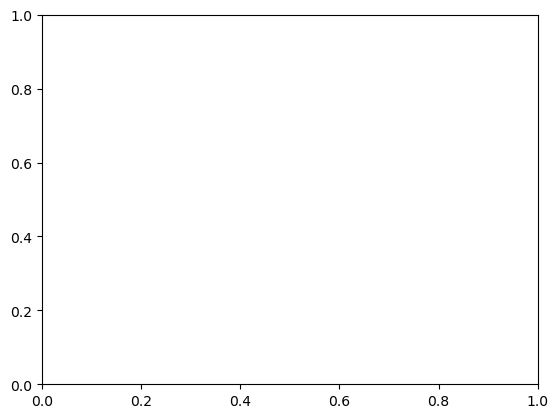

In [ ]:
plt.figure()
plt.bar(aggregated_df['relay_in_proportion'], aggregated_df['relay_in_proportion'].count(), =30)
plt.show()

In [174]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assume you have:
X = aggregated_df.drop(columns = ['points_sum'])
y = aggregated_df['points_sum']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 3: Train the model on the training set
rf_regressor.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")


Mean Squared Error: 27.3362
R^2 Score: 0.6286
